In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../archive/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17


In [4]:
df = (df.groupby("sex")["smoker"].value_counts(normalize=True).mul(100).round(2).unstack())

In [5]:
df

smoker,No,Yes
sex,,
Female,62.07,37.93
Male,61.78,38.22


<BarContainer object of 2 artists>

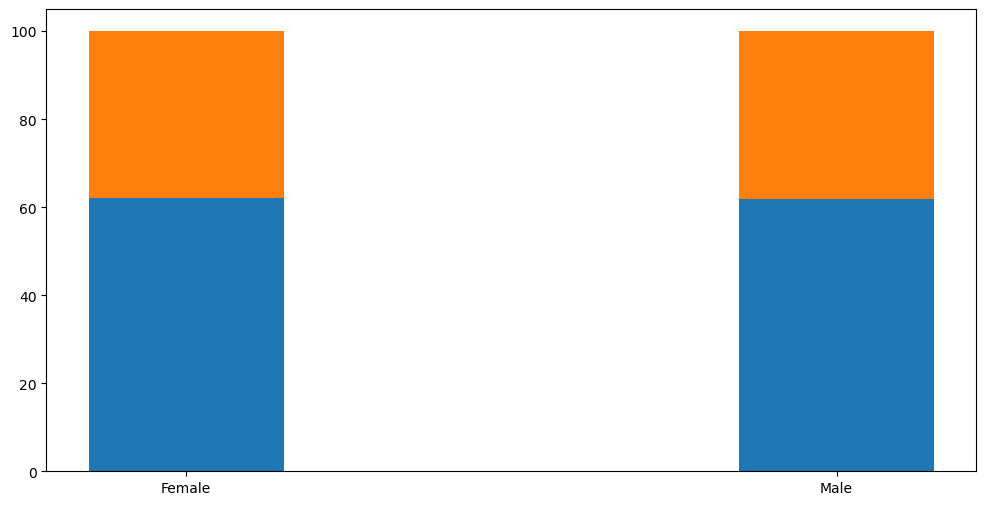

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(df.index, df['No'], label= "No", width=0.3)
ax.bar(df.index, df['Yes'], bottom=df.No, label= 'Yes', width=0.3)

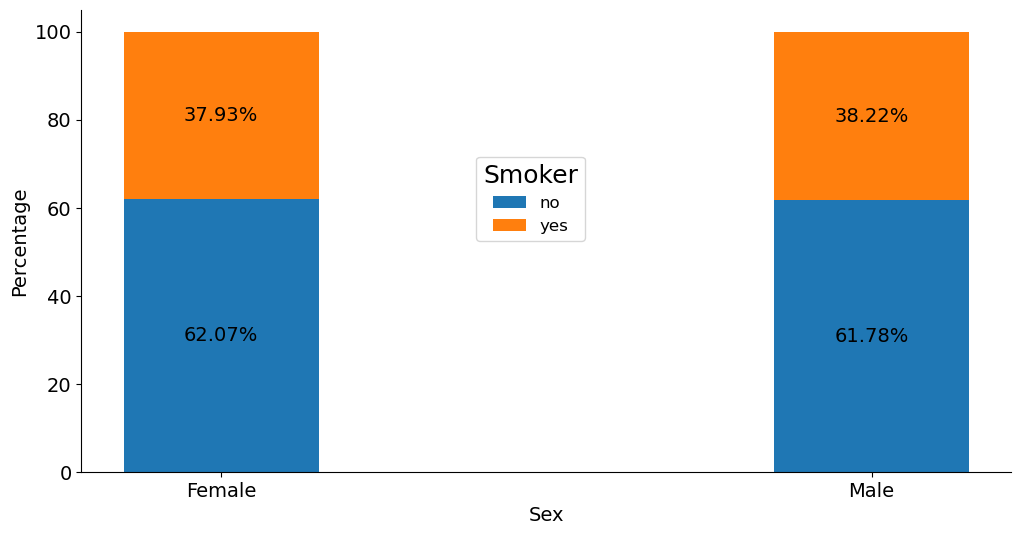

In [7]:
# Add labels
for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14) # add a container object "c" as first argument
# Remove spines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)
# Add labels
ax.tick_params(labelsize = 14, labelrotation = 0)
ax.set_ylabel("Percentage", size = 14)
ax.set_xlabel("Sex", size = 14)
# Add legend
ax.legend(labels = ["no", "yes"],
          fontsize = 12,
          title = "Smoker",
          title_fontsize = 18,
          bbox_to_anchor = [0.55, 0.7])
# Fix legend position
# ax.legend_.set_bbox_to_anchor([0.55, 0.7])
fig

<Axes: xlabel='sex'>

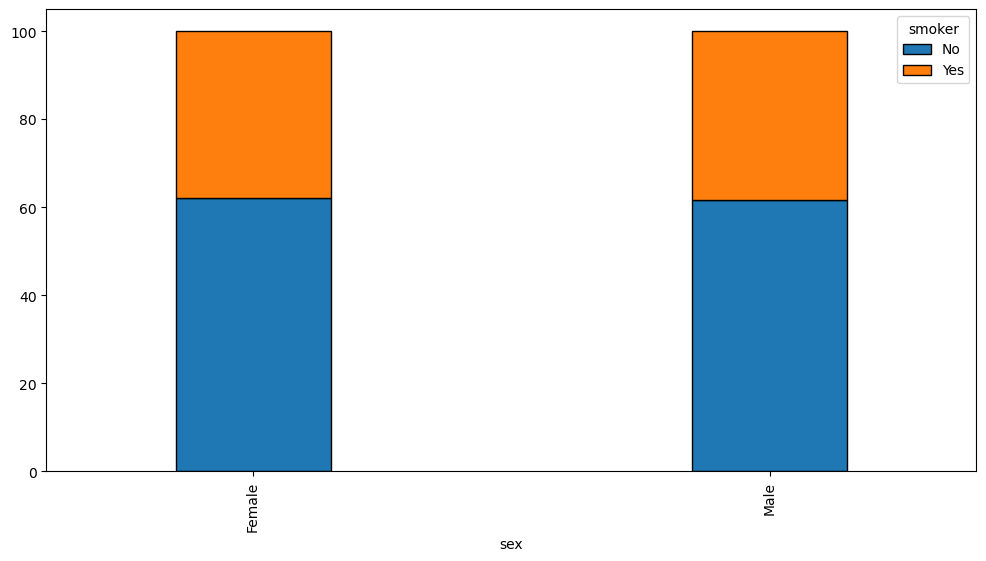

In [8]:
fig, ax = plt.subplots(figsize = (12, 6))
# Plot
df.plot(kind = "bar",
        stacked = True,
        ax = ax,
        width = 0.3,
        edgecolor = "black")

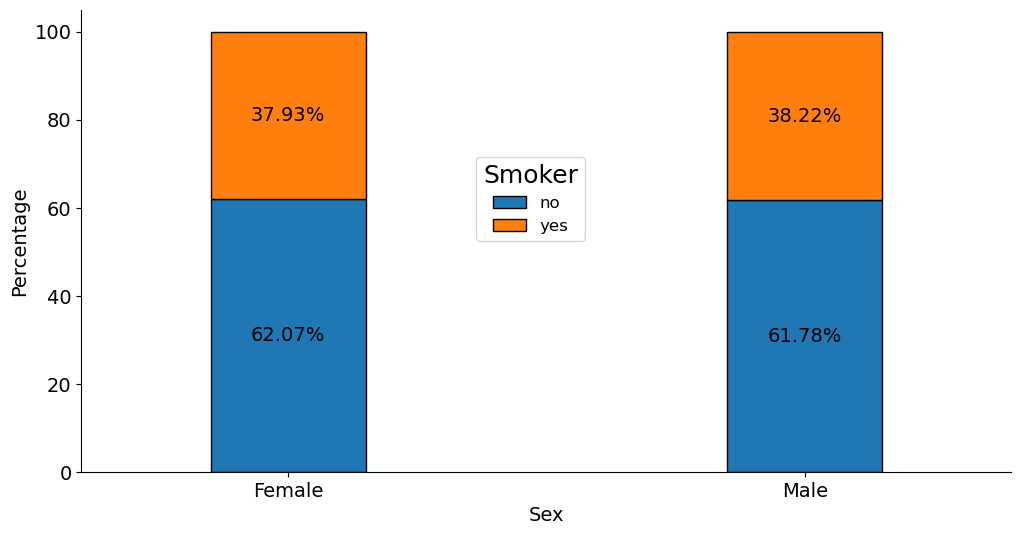

In [9]:
# Adding bar labels
for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14) # add a container object "c" as first argument
# Removing spines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)
# Adding tick and axes labels
ax.tick_params(labelsize = 14, labelrotation = 0)
ax.set_ylabel("Percentage", size = 14)
ax.set_xlabel("Sex", size = 14)
# Customising legend
ax.legend(labels = ["no", "yes"],
          fontsize = 12,
          title = "Smoker",
          title_fontsize = 18)
# Fixing legend position
ax.legend_.set_bbox_to_anchor([0.55, 0.7])
fig